In [2]:
from __future__ import absolute_import, division, print_function, 
unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [27]:
# 패션 Mnist 데이터셋 임포트

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [58]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

데이터 탐색

In [59]:
train_images.shape

(60000, 28, 28)

In [60]:
len(train_labels)

60000

In [61]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [62]:
test_images.shape

(10000, 28, 28)

In [63]:
len(test_labels)

10000

데이터 전처리

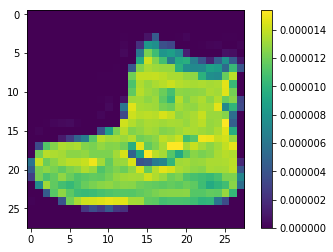

In [64]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [65]:
train_images = train_images / 255.0
test_images = test_images / 255.0

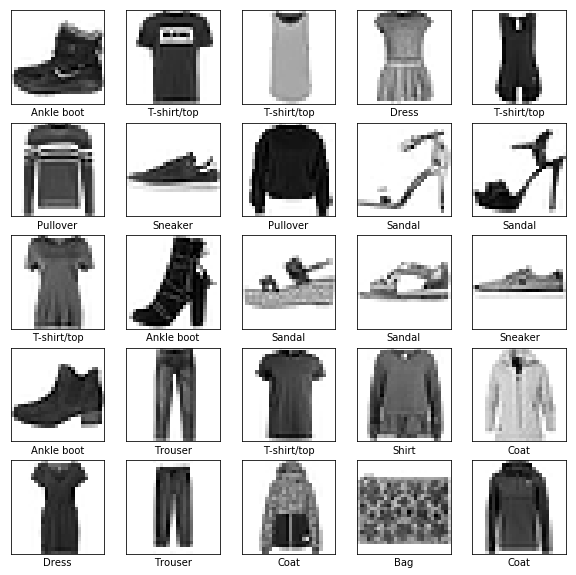

In [66]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

모델구성

In [67]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

모델 컴파일

In [68]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

모델 훈련

In [69]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 2.3028 - accuracy: 0.0980
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 2.3028 - accuracy: 0.0973
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 2.3027 - accuracy: 0.0993
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 2.3028 - accuracy: 0.0976
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 2.3028 - accuracy: 0.0974


정확도 평가

In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도: ', test_acc)

10000/1 - 0s - loss: 2.3014 - accuracy: 0.1000

테스트 정확도:  0.1


예측 만들기

In [71]:
predictions = model.predict(test_images)

In [72]:
predictions[0]

array([0.09920356, 0.09981336, 0.09978235, 0.0999198 , 0.09960947,
       0.09954384, 0.10068255, 0.09910713, 0.10202973, 0.10030825],
      dtype=float32)

In [73]:
np.argmax(predictions[0])

8

In [74]:
test_labels[0]

9

In [75]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


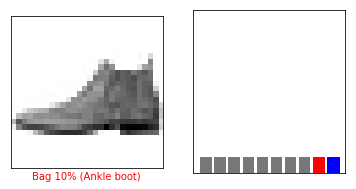

In [76]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

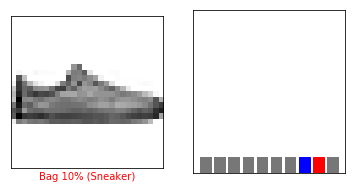

In [77]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

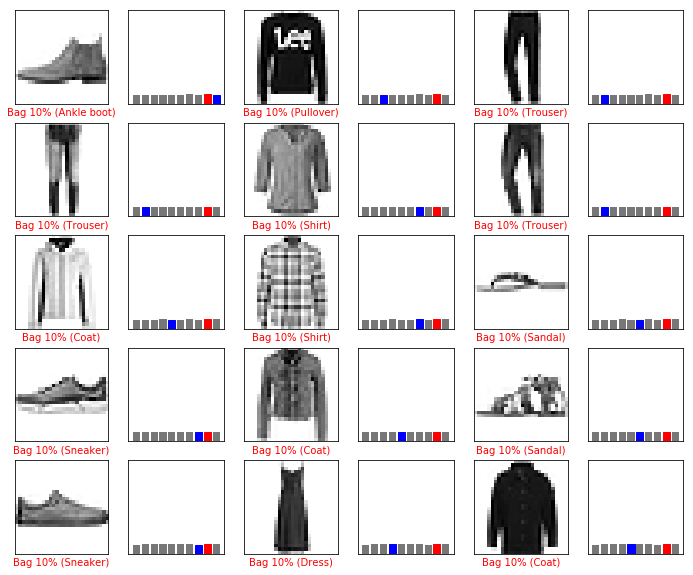

In [78]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [80]:
img = test_images[0]
print(img.shape)

(28, 28)


In [81]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [83]:
predictions_single = model.predict(img)
print(predictions_single)

[[0.09920356 0.09981336 0.09978235 0.0999198  0.09960947 0.09954384
  0.10068255 0.09910713 0.10202973 0.10030825]]


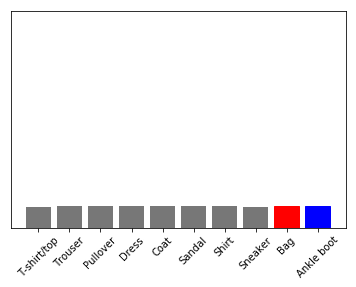

In [84]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [85]:
np.argmax(predictions_single[0])

8